# Summary

As you may notice from last chapter, the original dataset comes with 119 variables, we don't expect the model to analyze on them all as some variables may have a lot of noises which will end up weakening model's learning capability. A selection and filtering on variables is essential if we want to enhance the model learning result.



This section we will cover some steps and methods generally used for variables selection. Upon the completion of this chapter, you will know:



*   How to clean up the dataset by removing variables with a lot missing values/ are low variant
*   How to transform the categorical variables into numerical ones with WOE Transformation
*   How to measure the importance of variable using a machine learning model-- Random forest, and drop variables with low importance
*   How to quanify the amount of information hold by each variable, and remove those contain weak/minor information
*   How to remove variables that are highly correlated
*   Additionally, how to let a machine learning method--clustering to select 
variables for you(this part is optional)




Main python functions covered in this chapter:
*   **EDA()** function: from class function **EDA** which gives you count check results across dataset, the check results are returned in 2 parts, one for numerical variables and the other one for categorical variables.
*   **WOE()** function: from class function **WOE_Transformation** which performs the WOE transformation on input dataset.
*   **my_sklearn_rf()** function: from class function **MLM** which defines a suits of machine learning models. The my_sklearn_rf() is used for random forest modeling.
*   **my_corr()** function: from class function **SupportingFunction** which calculates correlation coefficient of all possible pairs of variables.
*   **cluster_analysis()** function: from class function **SupportingFunction** which applies cluster analysis on variables in dataset








# Load Libraries

In [1]:
## system config ##
import sys
import os
nb_dir = os.path.split(os.getcwd())[0] + "/" + os.path.split(os.getcwd())[1] + "/Self-defined Modules"
sys.path.append(nb_dir) # Add a directory into sys path

print ('Python', sys.version)

Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [2]:
## public libraries ##
# data manipulation
import pandas as pd
import numpy as np

# machine learning
from sklearn.model_selection import train_test_split

In [3]:
## self-defined modules ##
import EDA as EDA
import SupportingFunctions as SF
import WOE_Transformation as WOE  # self-defined module to calculate WOE (weight of evidence)
import MachineLearningModels as MLM  # self-definde collection of most useful models

# Import Data

In [4]:
## data loading ##
df_model = SF.load_csv(os.path.split(os.getcwd())[0] + "\\3. Output\\Intermediate Data\\modeling_ds.csv")

time elapsed: 4.819850921630859 seconds
dataframe dimension: (307511, 158)


# Variable Reduction

## VR.1 Drop High Missing & Low Variant

In [5]:
EDA_num, EDA_cat = EDA.EDA(df_model)

drop_num = EDA_num[(EDA_num['MissingCt']/EDA_num['Nobs'] >= 0.95) | (EDA_num['1%']==EDA_num['99%'])]['Feature']
drop_cat = EDA_cat[(EDA_cat['MissingCt']/EDA_cat['Nobs'] >= 0.95) | (EDA_cat['UniqueCt']==1)]['Feature']

print ("# of columns before:  " + str(len(df_model.columns)))

df_model = df_model.drop(drop_num, axis=1)
df_model = df_model.drop(drop_cat, axis=1)

print ("="*50)
print ("# of columns dropped: " + str(len(drop_num) + len(drop_cat)))
print ("# of columns left:    " + str(df_model.shape[1]))

# of columns before:  158
# of columns dropped: 25
# of columns left:    133


## VR.2 Apply WOE Transformation

In [6]:
# Identify categorical variables that should be transformed
var_y = 'TARGET'
var_x = df_model.columns.tolist()
var_x.remove(var_y)

try: 
    var_x.remove('SK_ID_CURR')
except: 
    print ("Column 'SK_ID_CURR' has been removed.")
    
var_cat = df_model.dtypes[df_model.dtypes == 'object'].index.tolist()
var_num_cat = [] # categorical variables stored as numeric. Manual examination is required
var_cat = var_cat + var_num_cat
var_num = list(set(var_x) -  set(var_cat))

In [7]:
## Apply WOE transformation to numerical variables
# WoE(number_of_buckets, min_num_of_observation_in_bucket, 'd'_for_continous_var, 'b'_for_binary_target_var)
numeric_woe = WOE.WoE(21, 51, v_type='c', t_type='b')

dict_woe = {}
i = 1
for col in var_num:
    print (str(i)+"/"+str(len(var_num)), col)
    i += 1
    woe_temp = numeric_woe.tree(df_model[col], df_model[var_y])
    dict_woe[col] = woe_temp
    df_model[col] = woe_temp.df.woe

1/115 FLOORSMIN_AVG
2/115 FLAG_EMP_PHONE
3/115 DAYS_LAST_PHONE_CHANGE
4/115 REG_CITY_NOT_LIVE_CITY
5/115 BASEMENTAREA_AVG
6/115 pre_app_PRODUCT_COMBINATION_nunique
7/115 pre_app_AMT_GOODS_PRICE_sum
8/115 DAYS_BIRTH
9/115 AMT_REQ_CREDIT_BUREAU_YEAR
10/115 ENTRANCES_AVG
11/115 REGION_RATING_CLIENT
12/115 LIVINGAPARTMENTS_AVG
13/115 YEARS_BEGINEXPLUATATION_AVG
14/115 pre_app_REFUSED_CONTRACT_max
15/115 bureau_STATUS_OPEN_CT
16/115 LATE_PAYMENT
17/115 pre_app_AMT_APPLICATION_sum
18/115 NONLIVINGAREA_MEDI
19/115 APARTMENTS_AVG
20/115 REGION_POPULATION_RELATIVE
21/115 NONLIVINGAREA_AVG
22/115 LIVE_CITY_NOT_WORK_CITY
23/115 SK_DPD60+_y
24/115 INSUFFICIENT_PAYMENT
25/115 bureau_AMT_CREDIT_SUM_OVERDUE
26/115 DEF_60_CNT_SOCIAL_CIRCLE
27/115 COMMONAREA_MEDI
28/115 FLOORSMIN_MEDI
29/115 FLOORSMAX_AVG
30/115 BASEMENTAREA_MEDI
31/115 bureau_AMT_ANNUITY
32/115 YEARS_BUILD_MODE
33/115 ELEVATORS_AVG
34/115 bureau_AMT_CREDIT_SUM_LIMIT
35/115 pre_app_REFUSED_CONTRACT_sum
36/115 LIVINGAREA_MODE
37/115 AMT

In [8]:
## Apply WOE transformation to categorical variables
# WoE(number_of_buckets, min_num_of_observation_in_bucket, 'd'_for_continous_var, 'b'_for_binary_target_var)
class_woe = WOE.WoE(21, 51, v_type='d', t_type='b')

dict_woe = {}
i = 1
for col in var_cat:
    print (str(i)+"/"+str(len(var_cat)), col)
    i += 1
    woe_temp = class_woe.categorical(df_model[col], df_model[var_y])
    dict_woe[col] = woe_temp
    df_model[col] = woe_temp.df.woe

1/16 NAME_CONTRACT_TYPE
2/16 CODE_GENDER
3/16 FLAG_OWN_CAR
4/16 FLAG_OWN_REALTY
5/16 NAME_TYPE_SUITE
6/16 NAME_INCOME_TYPE
7/16 NAME_EDUCATION_TYPE
8/16 NAME_FAMILY_STATUS
9/16 NAME_HOUSING_TYPE
10/16 OCCUPATION_TYPE
11/16 WEEKDAY_APPR_PROCESS_START
12/16 ORGANIZATION_TYPE
13/16 FONDKAPREMONT_MODE
14/16 HOUSETYPE_MODE
15/16 WALLSMATERIAL_MODE
16/16 EMERGENCYSTATE_MODE


## VR.3 Drop low Important Var (RF)

In [9]:
## Train & Test Split
X_train, X_test, y_train, y_test = train_test_split(df_model[var_x], df_model[var_y], test_size=0.33, random_state=66)

print ("X_train Shape: " + str(X_train.shape))
print ("y_train Shape: " + str(y_train.shape))
print ("X_test Shape: " + str(X_test.shape))
print ("y_test Shape: " + str(y_test.shape))

X_train Shape: (206032, 131)
y_train Shape: (206032,)
X_test Shape: (101479, 131)
y_test Shape: (101479,)


#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 50
min sample split: 100.00000
min sample leaf: 50.00000
min_impurity_decrease: 0.00000
###########################



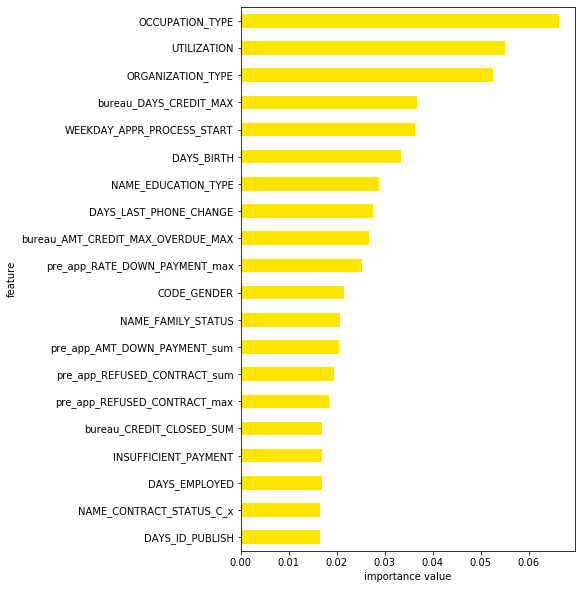

time elapsed: 176.5530984401703 seconds


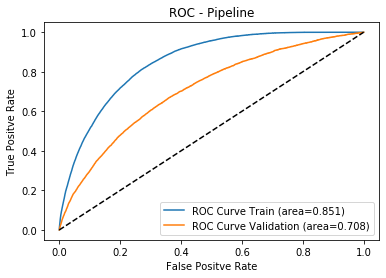

In [10]:
# Variable Reduction - Random Forest
model_rf, df_importance_rf, time_rf  = MLM.my_sklearn_rf(X_train, y_train, param = {"n_estimators":100,
                                                                                    "max_features":0.8,
                                                                                    "max_depth":50,
                                                                                    "min_samples_split":100,
                                                                                    "min_samples_leaf":50,
                                                                                    "min_impurity_decrease":0,
                                                                                    "random_state":66})

ls_roc_rf = SF.plot_roc(model_rf, X_train, X_test, y_train, y_test)

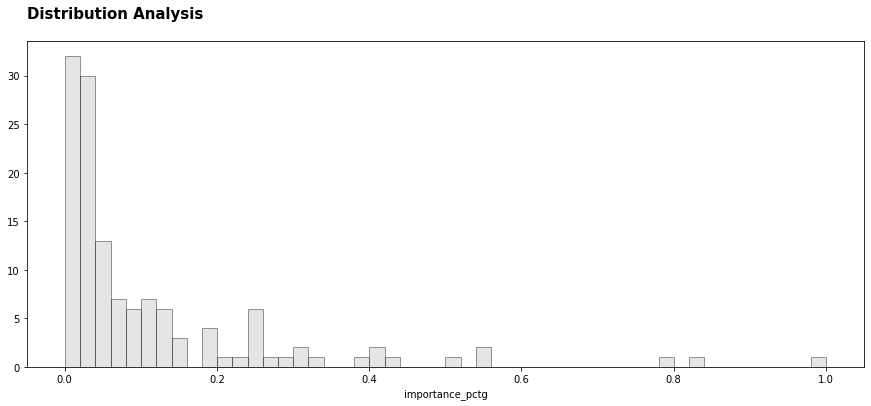

In [11]:
# plot the distribution
df_importance_rf['importance_pctg'] = df_importance_rf['importance'] * 1.0 / df_importance_rf['importance'].max()
SF.distribution_analysis_histo(df_importance_rf, 'importance_pctg')

In [12]:
var_x = df_importance_rf.loc[df_importance_rf['importance_pctg'] > 0.003, 'feature'].tolist()

print ("# of columns dropped: " + str(df_importance_rf.shape[0] - len(var_x)))
print ("# of columns left: " + str(len(var_x)))

df_importance_rf.to_csv(os.path.split(os.getcwd())[0] + "\\3. Output\\Variable Selection\\df_importance_rf_basic.csv", index=False)

# of columns dropped: 2
# of columns left: 129


## VR.4 Calculate Information Value (IV) & Drop Low IV Var

In [13]:
var_num = list(set(var_x) - set(var_cat))
var_y = 'TARGET'

class_woe = WOE.WoE(21, 51, v_type='c', t_type='b')

df_iv = pd.DataFrame(columns=['feature', 'iv'])

i = 1
for var in var_x:
    print (str(i)+"/"+str(len(var_x)), var)
    i +=1
    
    if var in var_cat: # categorical vars
        df_temp = np.array([var, dict_woe[var].iv])
        df_iv.loc[len(df_iv)] = df_temp
        
    if var in var_num: # numeric vars
        df_temp = np.array([var, class_woe.tree(df_model[var], df_model[var_y]).iv])
        df_iv.loc[len(df_iv)] = df_temp
    
df_iv['iv'] = df_iv['iv'].astype(float)

df_iv.to_csv(os.path.split(os.getcwd())[0] + "\\3. Output\\Variable Selection\\df_iv_basic.csv", index=False)

1/129 OCCUPATION_TYPE
2/129 UTILIZATION
3/129 ORGANIZATION_TYPE
4/129 bureau_DAYS_CREDIT_MAX
5/129 WEEKDAY_APPR_PROCESS_START
6/129 DAYS_BIRTH
7/129 NAME_EDUCATION_TYPE
8/129 DAYS_LAST_PHONE_CHANGE
9/129 bureau_AMT_CREDIT_MAX_OVERDUE_MAX
10/129 pre_app_RATE_DOWN_PAYMENT_max
11/129 CODE_GENDER
12/129 NAME_FAMILY_STATUS
13/129 pre_app_AMT_DOWN_PAYMENT_sum
14/129 pre_app_REFUSED_CONTRACT_sum
15/129 pre_app_REFUSED_CONTRACT_max
16/129 bureau_CREDIT_CLOSED_SUM
17/129 INSUFFICIENT_PAYMENT
18/129 DAYS_EMPLOYED
19/129 NAME_CONTRACT_STATUS_C_x
20/129 DAYS_ID_PUBLISH
21/129 REGION_RATING_CLIENT_W_CITY
22/129 LATE_PAYMENT
23/129 NAME_INCOME_TYPE
24/129 FLAG_OWN_CAR
25/129 FLAG_DOCUMENT_3
26/129 AMT_GOODS_PRICE
27/129 pre_app_NFLAG_INSURED_ON_APPROVAL_max
28/129 WALLSMATERIAL_MODE
29/129 bureau_AMT_CREDIT_SUM_LIMIT
30/129 REGION_RATING_CLIENT
31/129 OWN_CAR_AGE
32/129 AMT_REQ_CREDIT_BUREAU_YEAR
33/129 FLAG_OWN_REALTY
34/129 pre_app_NAME_PAYMENT_TYPE_nunique
35/129 bureau_AMT_ANNUITY
36/129 DAYS_RE

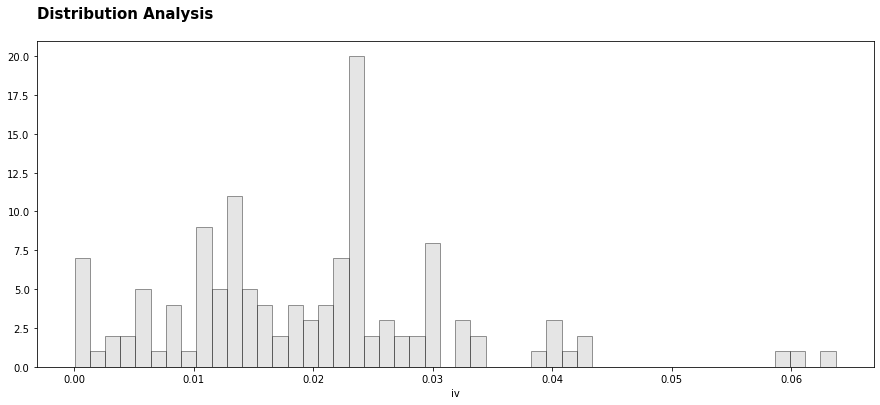

In [14]:
# check distribution
df_iv_temp = df_iv[(df_iv['feature'].isin(var_x))]
SF.distribution_analysis_histo(df_iv_temp, 'iv')

In [15]:
# drop low LV var
thrd = 0.01
df_iv = df_iv_temp[df_iv['iv'] >= thrd]
var_x = df_iv.feature.unique().tolist()

print ("# of columns dropped: " + str(len(df_iv_temp['feature']) - len(df_iv['feature'])))
print ("# of columns left: " + str(len(df_iv['feature'])))

# of columns dropped: 23
# of columns left: 106


## VR.5 Drop Highly Correlated Var

In [16]:
# my_corr(data_frame, method_can_be_pearson_kendall_spearman, if_true_then_remove_negative_signs)
# calculate the correlation coefficient for all possible pairs
corr = SF.my_corr(df_model[var_x], 'pearson', abs=True)

corr = pd.merge(corr, df_iv, how='left', left_on='var1', right_on='feature')
corr = pd.merge(corr, df_iv, how='left', left_on='var2', right_on='feature')

corr = corr.rename(columns={"iv_x":"iv_var1", "iv_y":"iv_var2"})
corr = corr[['var1', 'iv_var1', 'var2', 'iv_var2', 'corr']]

corr.to_csv(os.path.split(os.getcwd())[0] + "\\3. Output\\Variable Selection\\df_corr_basic.csv", index=False)

# drop lower information value
df_temp = corr[corr['corr'] > 0.9]
df_temp['to_drop'] = np.where(df_temp['iv_var1'] >= df_temp['iv_var2'], df_temp['var2'], df_temp['var1'])

# remove highly correlated vars
for var in df_temp['to_drop'].unique():
    var_x.remove(var)

print ("# of columns dropped: " + str(len(df_temp['to_drop'])))
print ("# of columns left: " + str(len(var_x)))

time elapsed: 13.107153177261353 seconds
# of columns dropped: 73
# of columns left: 70


C:\Users\QY742WL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


## VR.6 Drop Through Clustering Analysis (optional)

In [17]:
n_final_vars = 30

# cluster_analysis(data_frame, target_variable, variables_that_need_clustering, num_of_clusters)
# Use Ward and Mann clustering to cluster the variables in order to reduce dimensions
df_cluster = SF.cluster_analysis(df_model, var_y='TARGET', var_x=var_x, num_of_clusters=n_final_vars)
df_cluster.to_csv(os.path.split(os.getcwd())[0] + "\\3. Output\\Variable Selection\\df_cluster_basic.csv", index=False)

# please manually select final variables
df_cluster

,feature,ward_cluster,mann_cluster
0,OCCUPATION_TYPE,17,23
1,UTILIZATION,15,17
2,ORGANIZATION_TYPE,19,21
3,bureau_DAYS_CREDIT_MAX,21,29
4,WEEKDAY_APPR_PROCESS_START,2,6
...,...,...,...
65,FLOORSMIN_AVG,8,12
66,FLAG_EMP_PHONE,11,7
67,COMMONAREA_MODE,8,12
68,AMT_REQ_CREDIT_BUREAU_WEEK,0,3


# Output

In [18]:
df_model[var_x + ['SK_ID_CURR', 'TARGET']].to_csv(os.path.split(os.getcwd())[0] + "\\3. Output\\Intermediate Data\\modeling_ds_v2.csv", index=False)